In [1]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np

/root/work


In [2]:
!ls /root/projects/PythonProjects/ip-dual-encoder-factorization-machine/data/input/

ads-50k-events.csv  ads-50k.json


# Events data

In [3]:
file_events = '/root/projects/PythonProjects/ip-dual-encoder-factorization-machine/data/input/ads-50k-events.csv'
df_events = pd.read_csv(file_events)
df_events

,event_datetime,resume_id,job_id,event_platform,kind
0,2021-05-01T08:42:05,158655,38820886,IOS_APP,V
1,2021-05-01T08:42:05,158655,38901970,IOS_APP,V
2,2021-05-01T08:42:05,158655,38919645,IOS_APP,V
3,2021-05-01T08:42:05,158655,38928402,IOS_APP,V
4,2021-05-01T08:42:05,158655,38847632,IOS_APP,V
...,...,...,...,...,...
4304683,2021-05-01T03:34:41,97605,38984280,WEB,V
4304684,2021-05-01T03:34:41,97605,38977257,WEB,V
4304685,2021-05-01T03:34:41,97605,38943585,WEB,V
4304686,2021-05-01T03:34:41,97605,38864861,WEB,V


## Removing the duplicated event logs

In [4]:
df_events = df_events.drop_duplicates().copy()
len(df_events.index)

1434896

In [5]:
df_events.isna().sum(axis=0)

event_datetime    0
resume_id         0
job_id            0
event_platform    0
kind              0
dtype: int64

In [6]:
df_events['event_datetime'] = pd.to_datetime(df_events['event_datetime'])
df_events['resume_id'] = df_events['resume_id'].astype(int)
df_events['job_id'] = df_events['job_id'].astype(int)
df_events['event_platform'] = df_events['event_platform'].astype(str)
df_events['kind'] = df_events['kind'].astype(str)
df_events.dtypes

event_datetime    datetime64[ns]
resume_id                  int64
job_id                     int64
event_platform            object
kind                      object
dtype: object

## column `event_datetime`

In [7]:
df_events['event_datetime'].min(), df_events['event_datetime'].max()

(Timestamp('2021-05-01 00:00:00'), Timestamp('2021-05-01 23:58:54'))

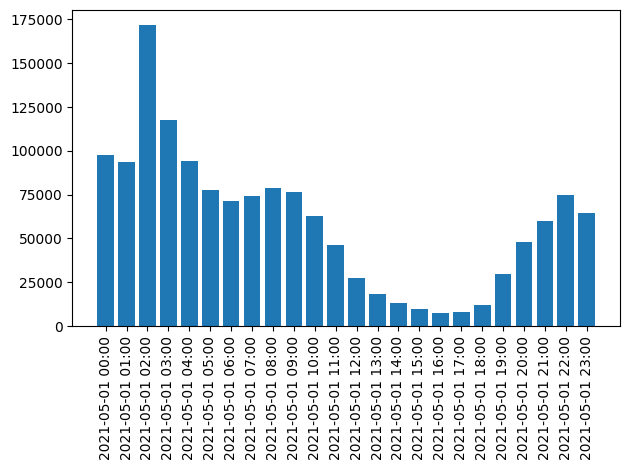

In [8]:
import matplotlib.pyplot as plt
df_events['event_datetime_period'] = df_events['event_datetime'].dt.to_period(freq='H').astype(str)
df_event_datetime_period = df_events['event_datetime_period'].value_counts().reset_index().sort_values(by='event_datetime_period').reset_index(drop=True)

# plt.bar(list(map(str, df_event_datetime_period.index)), df_event_datetime_period['event_datetime_period'])
plt.bar(df_event_datetime_period['event_datetime_period'], df_event_datetime_period['count'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## column `resume_id`

In [9]:
print('Number of unique users: ', df_events['resume_id'].nunique())

Number of unique users:  29578


Per-user event number distribution:


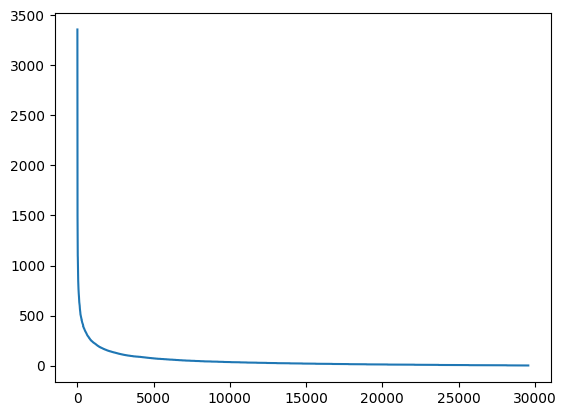

In [10]:
df_events_user = df_events['resume_id'].value_counts().reset_index()

print('Per-user event number distribution:')
df_events_user['count'].plot.line()
plt.show()

In [11]:
df_events_user['count'].describe()

count    29578.000000
mean        48.512273
std         95.585588
min          1.000000
25%          8.000000
50%         20.000000
75%         49.000000
max       3359.000000
Name: count, dtype: float64

In [12]:
print(f'User#245 has max number of events: 3359. Avg number of events per min in 24 hours: {3359/24/60}.')
df_events[df_events['resume_id']==df_events_user.loc[0, 'resume_id']]

User#245 has max number of events: 3359. Avg number of events per min in 24 hours: 2.332638888888889.


,event_datetime,resume_id,job_id,event_platform,kind,event_datetime_period
3153087,2021-05-01 01:32:46,245,38998941,WEB,V,2021-05-01 01:00
3153088,2021-05-01 01:32:46,245,38824276,WEB,V,2021-05-01 01:00
3153089,2021-05-01 01:32:46,245,38979948,WEB,V,2021-05-01 01:00
3153090,2021-05-01 01:32:46,245,38823030,WEB,V,2021-05-01 01:00
3153091,2021-05-01 01:32:46,245,38947689,WEB,V,2021-05-01 01:00
...,...,...,...,...,...,...
3163147,2021-05-01 23:03:50,245,38940102,WEB,V,2021-05-01 23:00
3163148,2021-05-01 23:03:50,245,38916091,WEB,V,2021-05-01 23:00
3163149,2021-05-01 23:03:50,245,38848600,WEB,V,2021-05-01 23:00
3163150,2021-05-01 23:03:50,245,38934257,WEB,V,2021-05-01 23:00


In [13]:
print('User#245\'s events mostly happened after midnight:')
df_events[df_events['resume_id']==df_events_user.loc[0, 'resume_id']]['event_datetime_period'].value_counts()

User#245's events mostly happened after midnight:


event_datetime_period
2021-05-01 02:00    1311
2021-05-01 03:00     743
2021-05-01 01:00     610
2021-05-01 00:00     601
2021-05-01 10:00      50
2021-05-01 09:00      33
2021-05-01 23:00       6
2021-05-01 22:00       5
Name: count, dtype: int64

 ## column `job_id`

In [14]:
print('Number of unique jobs: ', df_events['job_id'].nunique())

Number of unique jobs:  50000


Per-job event number distribution:


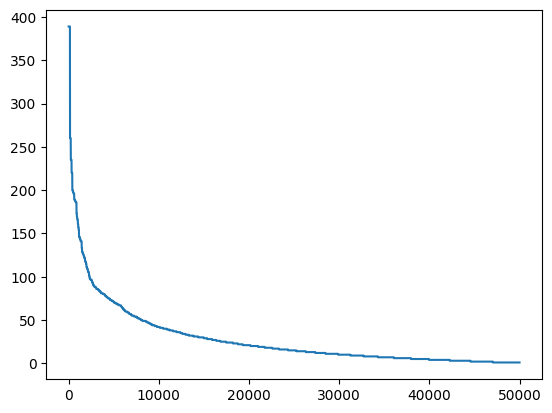

In [15]:
df_events_job = df_events['job_id'].value_counts().reset_index()
print('Per-job event number distribution:')
df_events_job['count'].plot.line()
plt.show()

In [16]:
df_events_job['count'].describe()

count    50000.000000
mean        28.697920
std         40.917611
min          1.000000
25%          6.000000
50%         15.000000
75%         35.000000
max        389.000000
Name: count, dtype: float64

## column `event_platform` and `kind`

In [17]:
df_events['event_platform'].value_counts()

event_platform
WEB            506668
IOS_APP        474427
ANDROID_APP    453801
Name: count, dtype: int64

In [18]:
df_events['kind'].value_counts()

kind
V    1314401
A     120495
Name: count, dtype: int64

## `event_datetime_period` vs. `resume_id`

In [19]:
df_events['event_datetime_period']

0          2021-05-01 08:00
1          2021-05-01 08:00
2          2021-05-01 08:00
3          2021-05-01 08:00
4          2021-05-01 08:00
                 ...       
4304655    2021-05-01 22:00
4304676    2021-05-01 03:00
4304677    2021-05-01 03:00
4304678    2021-05-01 03:00
4304679    2021-05-01 03:00
Name: event_datetime_period, Length: 1434896, dtype: object

In [20]:
print('Most users\' events happened within 1-3 hours:')
df_events[['event_datetime_period', 'resume_id']].drop_duplicates().groupby(by='resume_id').agg(len).value_counts()

Most users' events happened within 1-3 hours:


event_datetime_period
1                        23159
2                         4714
3                         1133
4                          364
5                          124
6                           43
7                           20
8                           14
9                            5
10                           1
11                           1
Name: count, dtype: int64

## Drop the temporary column `event_datetime_period`; keep `event_datetime` for the clicked job sequences

In [21]:
# if 'event_datetime' in df_events.columns:
#     df_events = df_events.drop(columns=['event_datetime', 'event_datetime_period'])
#

if 'event_datetime_period' in df_events.columns:
    df_events = df_events.drop(columns='event_datetime_period')

df_events

,event_datetime,resume_id,job_id,event_platform,kind
0,2021-05-01 08:42:05,158655,38820886,IOS_APP,V
1,2021-05-01 08:42:05,158655,38901970,IOS_APP,V
2,2021-05-01 08:42:05,158655,38919645,IOS_APP,V
3,2021-05-01 08:42:05,158655,38928402,IOS_APP,V
4,2021-05-01 08:42:05,158655,38847632,IOS_APP,V
...,...,...,...,...,...
4304655,2021-05-01 22:29:00,11124,38863789,WEB,V
4304676,2021-05-01 03:34:41,97605,38977257,WEB,V
4304677,2021-05-01 03:34:41,97605,38943585,WEB,V
4304678,2021-05-01 03:34:41,97605,38864861,WEB,V


## `resume_id` VS. `job_id`

Most users have very few view interactions with jobs.
kind=V: 	 user_count=29489 	 mode=3


,resume_id,job_count
211,245,1921
3770,5046,1344
2499,3272,1227
3364,4456,1124
851,1099,1019
...,...,...
20599,160818,1
11805,45203,1
18262,127523,1
21944,188395,1


[]

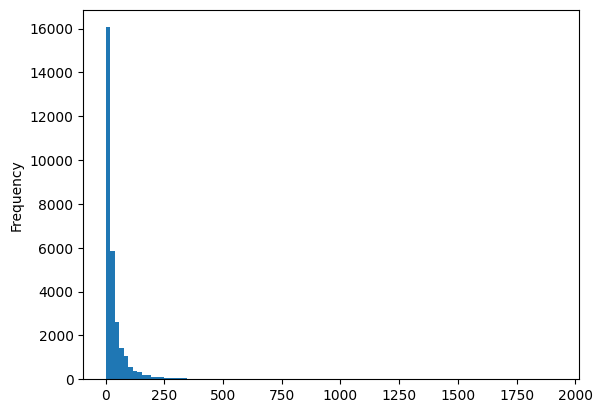

In [22]:
print('Most users have very few view interactions with jobs.')

df_resumeId_jobCount = df_events.loc[df_events['kind']=='V', ['resume_id', 'job_id']].groupby('resume_id').agg(lambda x: x.nunique()).reset_index(drop=False).rename(columns={'job_id':'job_count'}).sort_values('job_count', ascending=False)

print(f'kind=V: \t user_count={len(df_resumeId_jobCount.index)} \t mode={df_resumeId_jobCount["job_count"].mode()[0]}')

display(df_resumeId_jobCount)
df_resumeId_jobCount['job_count'].plot.hist(bins=100)
plt.plot()

## Choose only the active users with View interactions with at least 10 unique jobs
This is related to train/validation/test data split

In [23]:
active_users = df_resumeId_jobCount.loc[df_resumeId_jobCount['job_count']>=10, 'resume_id']
df_events = df_events[df_events['resume_id'].isin(active_users)]
print('Number of active users:', len(active_users.index))

Number of active users: 20159


## `resume_id` vs. `platform`

`event_platform` can be discarded because most users use only 1 platform, thus as a feature it is not discriminative.
kind=V: 	 user_count=20159 	 mode=1


event_platform
1                 19471
2                   684
3                     4
Name: count, dtype: int64

[]

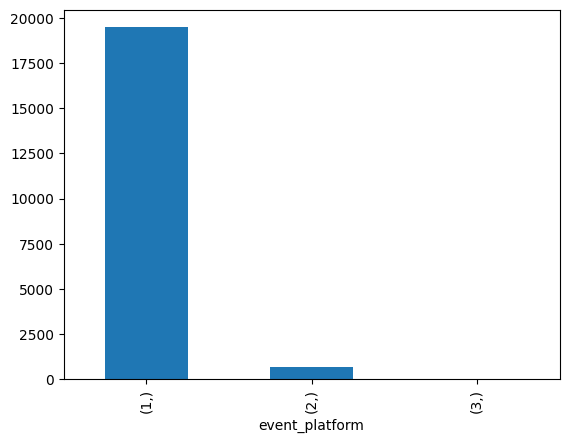

In [24]:
print('`event_platform` can be discarded because most users use only 1 platform, thus as a feature it is not discriminative.')

df_resume_id_platform = df_events.loc[df_events['kind']=='V', ['resume_id', 'event_platform']].groupby('resume_id').agg(lambda x: x.nunique()).sort_values('event_platform', ascending=False)
# display(df_resume_id_location)

print(f'kind=V: \t user_count={len(df_resume_id_platform.index)} \t mode={df_resume_id_platform["event_platform"].mode()[0]}')
df_resume_id_platform = df_resume_id_platform.value_counts()
display(df_resume_id_platform)
df_resume_id_platform.plot.bar()
plt.plot()

In [25]:
df_events = df_events.drop(columns='event_platform')

## Repeated events by users (on different `event_datetime`)

Repeated (duplicated) view events

In [26]:
df_events.loc[df_events['kind']=='V', ['resume_id', 'job_id', 'kind']].value_counts().reset_index()

,resume_id,job_id,kind,count
0,11931,38885192,V,19
1,11931,38998718,V,19
2,11931,38836316,V,19
3,5629,38896371,V,18
4,5629,38951213,V,18
...,...,...,...,...
1055192,8235,38926658,V,1
1055193,8235,38927300,V,1
1055194,8235,38927468,V,1
1055195,8235,38927542,V,1


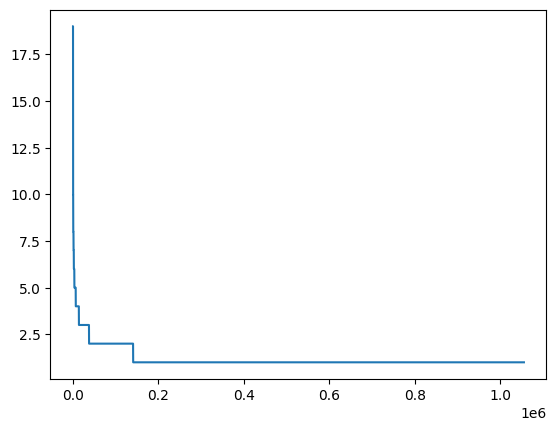

In [27]:
df_events.loc[df_events['kind']=='V', ['resume_id', 'job_id', 'kind']].value_counts().reset_index()['count'].plot.line()
plt.show()

Repeated (duplicated) application events

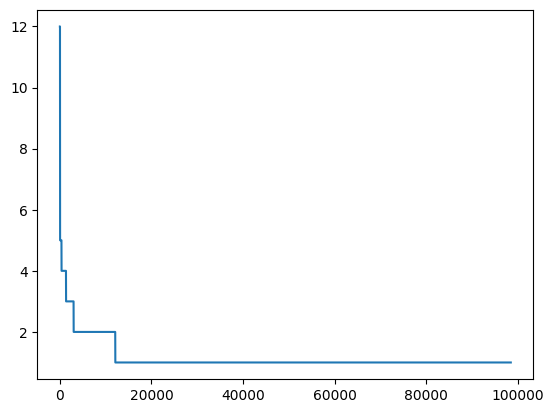

In [28]:
df_events.loc[df_events['kind']=='A', ['resume_id', 'job_id', 'kind']].value_counts().reset_index()['count'].plot.line()
plt.show()

## Removing all repeated(duplicated) event rows

In [29]:
display(len(df_events.index))

df_events = df_events.drop_duplicates(subset=['resume_id', 'job_id', 'kind'], keep='first')
len(df_events.index)

1375719

1153687

## Rechecking

In [30]:
df_events['kind'].value_counts()

kind
V    1055197
A      98490
Name: count, dtype: int64

## Final data

In [31]:
df_events

,event_datetime,resume_id,job_id,kind
0,2021-05-01 08:42:05,158655,38820886,V
1,2021-05-01 08:42:05,158655,38901970,V
2,2021-05-01 08:42:05,158655,38919645,V
3,2021-05-01 08:42:05,158655,38928402,V
4,2021-05-01 08:42:05,158655,38847632,V
...,...,...,...,...
4304651,2021-05-01 22:29:00,11124,38933688,V
4304652,2021-05-01 22:29:00,11124,38992991,V
4304653,2021-05-01 22:29:00,11124,38821247,V
4304654,2021-05-01 22:29:00,11124,38899420,V


In [32]:
file_out = '/root/projects/PythonProjects/ip-dual-encoder-factorization-machine/data/input_processed/ads-50k-events_processed.csv'
df_events.to_csv(file_out, index=False)

# Summary

1) On this particular day, there are much fewer events in the afternoon.
2) On this particular day, for most users, his/her events happen within 1-3 hours.
3) Some users, e.g. user#245, have much more events than others.
4) The distributions of numbers of events per user and per job are long tail: most users/jobs have small numbers of events, very few users/jobs have large number of events.
  The data sparsity issue is expected in the recommendation setting. However in the job recommendation setting, the sparsity issue (or cold start problem) is increased due to the fact that **jobs are short lived**. This is similar to news recommendation. This likely causes higher data sparsity to CF and thus prediction difficulty. It is probably more preferable to focus on content-based approaches.
5) Duplicated view and application events can be deduplicated. The duplications could be due to logging methods or users' repeated activities.
https://medium.com/pinterest-engineering/building-a-real-time-user-action-counting-system-for-ads-88a60d9c9a